In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

### Loading Model

In [4]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

### Visualising and Performing Prediction on Single image

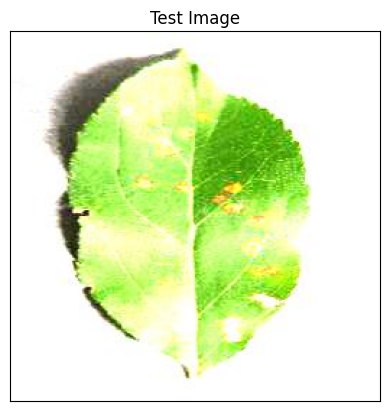

In [7]:
#Test Image Visualization
import cv2
image_path = 'test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


In [9]:
print(predictions)

[[2.53916124e-08 1.11477618e-06 9.99888301e-01 9.52390389e-10
  1.17126081e-06 5.85538231e-08 1.08175656e-10 3.02823744e-09
  6.23868596e-11 3.38194889e-10 4.96580424e-13 3.80687943e-08
  2.13102155e-07 3.00343861e-10 7.15157031e-11 2.18192309e-09
  1.42621923e-06 1.83245547e-07 8.98421567e-05 1.55437817e-07
  8.49737003e-10 4.15106199e-10 8.36968439e-10 7.03131886e-10
  3.56172557e-12 3.41215944e-11 2.26864239e-09 4.07381767e-10
  7.07079693e-08 1.54491681e-05 5.01651243e-07 1.80997990e-08
  2.75528862e-07 2.09633005e-10 1.11542920e-06 8.42009396e-09
  2.13177049e-08 1.17206811e-09]]


In [10]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


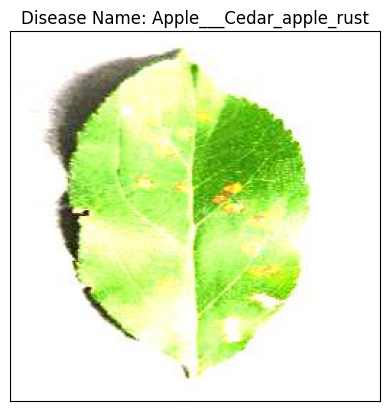

In [11]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

### For second image

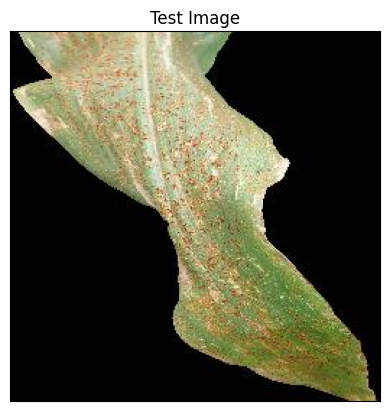

In [12]:
#Test Image Visualization
import cv2
image_path = 'test/CornCommonRust3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [14]:
print(predictions)

[[4.9621111e-27 3.9171794e-30 1.0846325e-31 0.0000000e+00 8.8488774e-37
  0.0000000e+00 0.0000000e+00 3.2367320e-23 1.0000000e+00 2.8437870e-28
  5.3908246e-26 0.0000000e+00 4.4142774e-38 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.0381964e-37 0.0000000e+00 9.5322895e-37 0.0000000e+00
  1.0224213e-33 0.0000000e+00 3.1337001e-33 0.0000000e+00 0.0000000e+00
  2.7170948e-34 4.6156722e-37 0.0000000e+00 0.0000000e+00 3.9456879e-38
  3.5584727e-18 7.1861082e-36 3.1735292e-34 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.5500798e-37]]


In [15]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

8


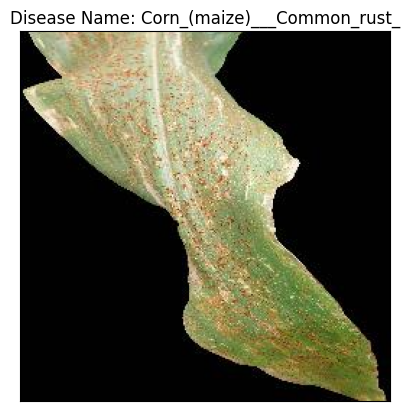

In [16]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

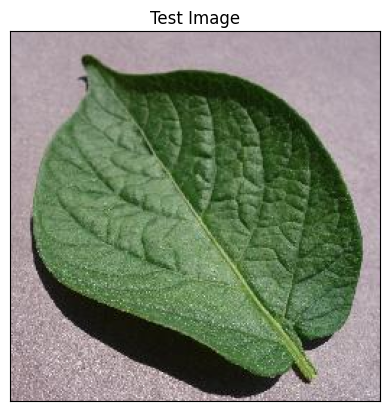

In [17]:
#Test Image Visualization
import cv2
image_path = 'test/PotatoHealthy1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [20]:
print(predictions)

[[3.2604335e-06 8.0431772e-07 8.5106713e-09 6.1610728e-03 8.8921970e-06
  2.8370247e-05 1.1562441e-02 6.8800084e-11 1.8975213e-09 7.2750035e-11
  1.6824925e-10 5.0081802e-08 1.6865916e-07 4.0437484e-10 7.0858003e-10
  2.9456589e-07 1.5019442e-06 2.1415906e-05 4.7242461e-04 6.1931735e-04
  3.9478182e-05 4.8159671e-04 9.8057073e-01 4.4886386e-07 9.8330031e-07
  1.2518302e-10 1.9999113e-10 3.3558578e-07 5.7418879e-11 1.5596984e-06
  2.4189669e-05 1.4915399e-08 2.2433927e-08 1.6108391e-08 3.6968197e-07
  4.3728515e-10 5.8566585e-10 5.3473627e-08]]


In [21]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

22


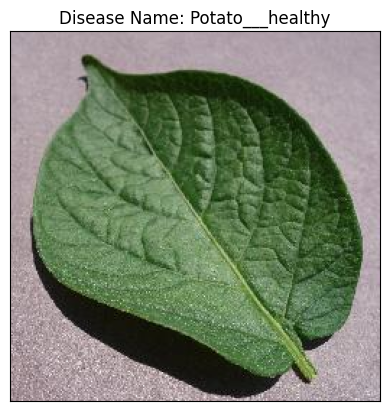

In [22]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()